In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


### Reading Month 1 Data

In [2]:
month1=pd.read_csv('month1_RL.csv')
print('Month 1 size',month1.shape)
month1.head()

('Month 1 size', (2976, 6))


,Date_Time,TEMPERATURE,Day,Hour,Workday,CONSUMPTION
0,01-01-17 0:00,35.099998,1,0,1,27.8
1,01-01-17 0:15,35.099998,1,0,1,29.0
2,01-01-17 0:30,35.099998,1,0,1,28.5
3,01-01-17 0:45,35.099998,1,0,1,28.0
4,01-01-17 1:00,33.200001,1,1,1,27.7


### Separating each input variable

In [3]:
X_month1_temperature=month1.iloc[:,1:2]
X_month1_day=month1.iloc[:,2:3]
X_month1_hour=month1.iloc[:,3:4]
X_month1_workday=month1.iloc[:,4:5]
X_month1=month1.iloc[:,1:5]
X_month1.head()

,TEMPERATURE,Day,Hour,Workday
0,35.099998,1,0,1
1,35.099998,1,0,1
2,35.099998,1,0,1
3,35.099998,1,0,1
4,33.200001,1,1,1


### Energy consumption for Month 1

In [4]:
Y_month1=month1.iloc[:,5:6]
Y_month1.head()


,CONSUMPTION
0,27.8
1,29.0
2,28.5
3,28.0
4,27.7


### Fitting each variable

In [5]:
clf1 = tree.DecisionTreeRegressor(max_depth=4,max_features=1)
clf1 = clf1.fit(X_month1_temperature, Y_month1)

clf2 = tree.DecisionTreeRegressor(max_depth=4,max_features=1)
clf2 = clf2.fit(X_month1_day, Y_month1)

clf3 = tree.DecisionTreeRegressor(max_depth=4,max_features=1)
clf3 = clf3.fit(X_month1_hour, Y_month1)

clf4 = tree.DecisionTreeRegressor(max_depth=4,max_features=1)
clf4 = clf4.fit(X_month1_workday, Y_month1)

clf5 = tree.DecisionTreeRegressor(max_depth=4,max_features=4)
clf5 = clf5.fit(X_month1, Y_month1)


### Interpretation with respect to temperature

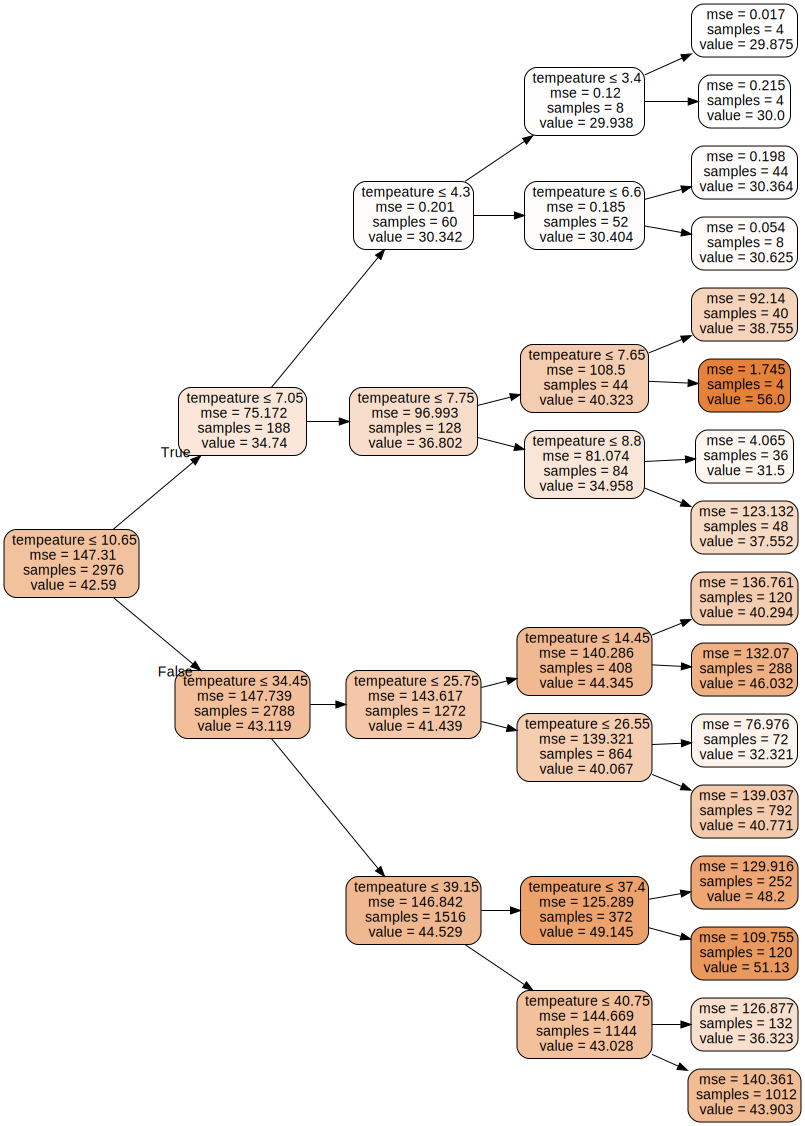

In [6]:
import graphviz 
dot_data = tree.export_graphviz(clf1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("month")
dot_data = tree.export_graphviz(clf1, out_file=None, 
                         feature_names=["tempeature"],    
                         filled=True, rounded=True,  
                         special_characters=True,
                               rotate=True)
graph = graphviz.Source(dot_data) 
graph

### Interpretation with respect to day

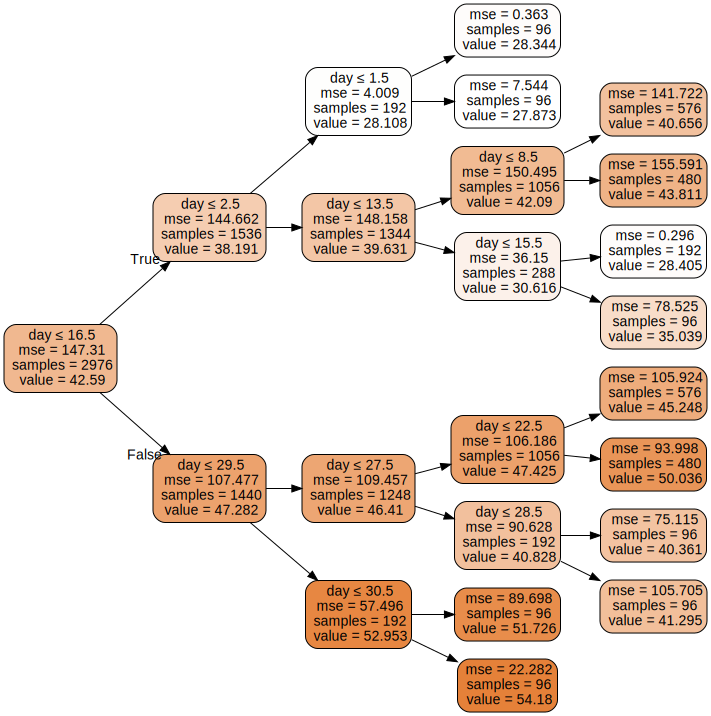

In [7]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=["day"],    
                         filled=True, rounded=True,  
                         special_characters=True,
                               rotate=True)
graph = graphviz.Source(dot_data) 
graph


### Interpretation with respect to hour

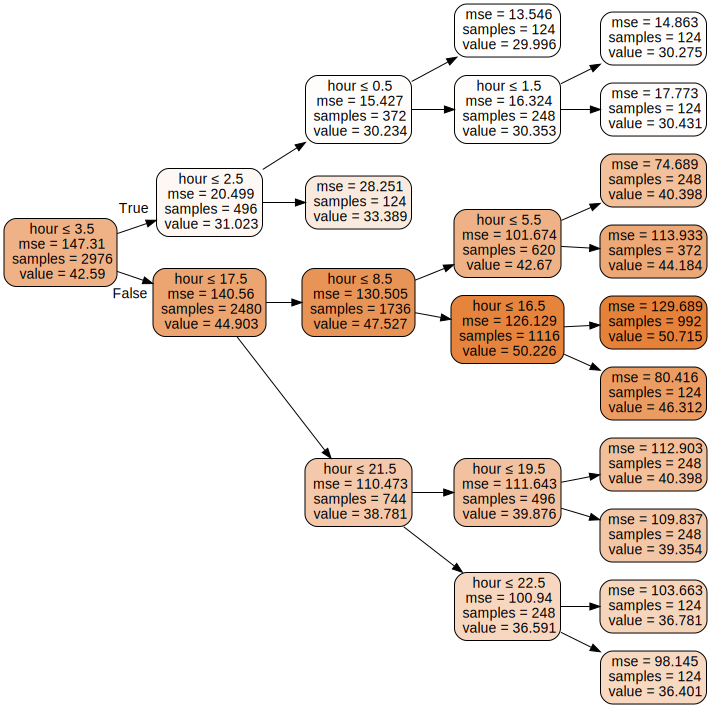

In [8]:
dot_data = tree.export_graphviz(clf3, out_file=None, 
                         feature_names=["hour"],    
                         filled=True, rounded=True,  
                         special_characters=True,
                               rotate=True)
graph = graphviz.Source(dot_data) 
graph

### Interpretation with respect to workday

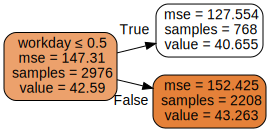

In [9]:
dot_data = tree.export_graphviz(clf4, out_file=None, 
                         feature_names=["workday"],    
                         filled=True, rounded=True,  
                         special_characters=True,
                               rotate=True)
graph = graphviz.Source(dot_data) 
graph

### Interpretation with respect to temperature,day,hour, workday or not

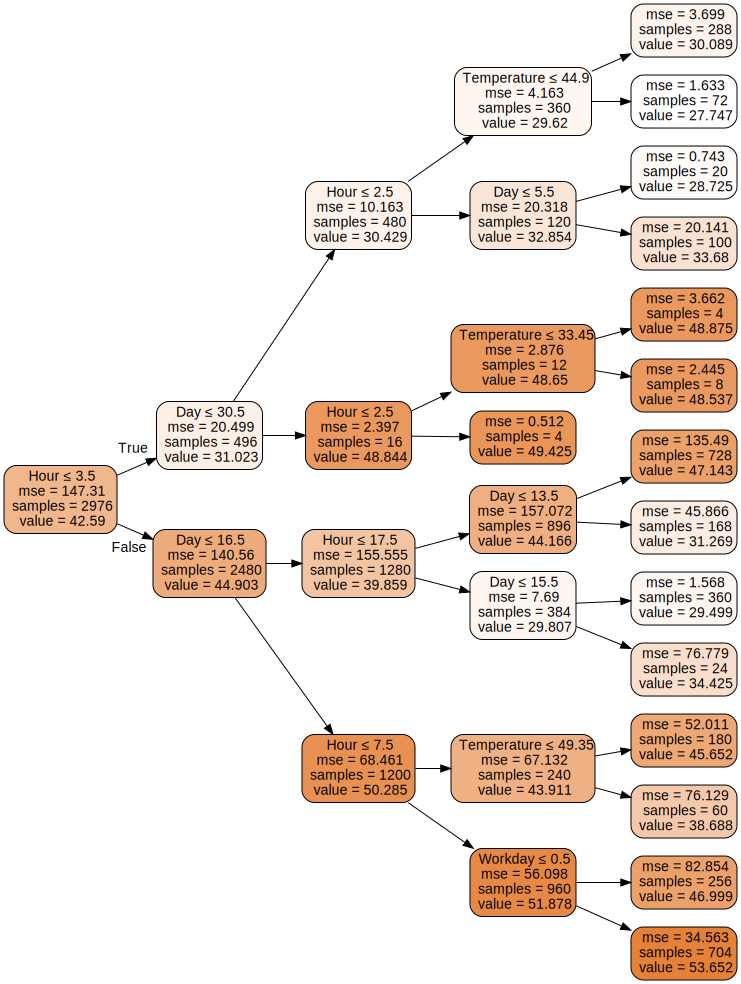

In [10]:
dot_data = tree.export_graphviz(clf5, out_file=None, 
                         feature_names=["Temperature","Day","Hour","Workday"],    
                         filled=True, rounded=True,  
                         special_characters=True,
                               rotate=True)
graph = graphviz.Source(dot_data) 
graph


In [11]:
# Split into Features and Labels

X = month1.drop(['CONSUMPTION','Date_Time'], axis = 1)

y = month1[['CONSUMPTION']]

In [12]:
# Split into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, shuffle = True, random_state = 42)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
month1.head()

,Date_Time,TEMPERATURE,Day,Hour,Workday,CONSUMPTION
0,01-01-17 0:00,35.099998,1,0,1,27.8
1,01-01-17 0:15,35.099998,1,0,1,29.0
2,01-01-17 0:30,35.099998,1,0,1,28.5
3,01-01-17 0:45,35.099998,1,0,1,28.0
4,01-01-17 1:00,33.200001,1,1,1,27.7


In [15]:
month1.columns


Index([u'Date_Time', u'TEMPERATURE', u'Day', u'Hour', u'Workday',
       u'CONSUMPTION'],
      dtype='object')

In [16]:
type(month1)

pandas.core.frame.DataFrame

In [17]:
month1.size

17856

In [18]:
X_train.head()


,TEMPERATURE,Day,Hour,Workday
1557,53.000000,17,5,1
509,7.600000,6,7,0
2044,49.700001,22,7,1
1847,45.900002,20,5,0
2097,54.700001,22,20,1


In [19]:
y_train.head()


,CONSUMPTION
1557,45.3
509,52.3
2044,29.3
1847,49.5
2097,47.2


# LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Calculating the MSE

from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X_train)

lin_mse = mean_squared_error(y_train, y_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

11.098564594418308

In [22]:
corr_matrix = month1.corr()

corr_matrix["CONSUMPTION"].sort_values(ascending=False)

CONSUMPTION    1.000000
Day            0.332697
Hour           0.179267
TEMPERATURE    0.123094
Workday        0.094034
Name: CONSUMPTION, dtype: float64

# Ridge Regression

In [23]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.05, solver="cholesky")
ridge_reg.fit(X_train, y_train)

ridge_reg.score(X_train, y_train)

0.15998564764120593

In [24]:
# Calculating the MSE

from sklearn.metrics import mean_squared_error

y_predict_ridge = ridge_reg.predict(X_train)

ridge_mse = mean_squared_error(y_train, y_predict_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

11.098564595511466

In [25]:
# Cross Validation

from sklearn.model_selection import cross_val_score


scores_ridge = cross_val_score(ridge_reg, X_train, y_train, cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")

ridge_rmse_scores = np.sqrt(-scores_ridge)
ridge_rmse_scores.mean()

11.121371059856115

# Lasso Regression

In [26]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.05, random_state = 42)
lasso_reg.fit(X_train, y_train)

lasso_reg.score(X_train, y_train)

0.1598910805377527

In [27]:
# Calculating the MSE

from sklearn.metrics import mean_squared_error

y_predict_lasso = lasso_reg.predict(X_train)

lasso_mse = mean_squared_error(y_train, y_predict_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

11.09918930481893

In [28]:
# Cross Validation

from sklearn.model_selection import cross_val_score


scores_lasso = cross_val_score(lasso_reg, X_train, y_train, cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")

lasso_rmse_scores = np.sqrt(-scores_lasso)
lasso_rmse_scores.mean()

11.122099240384962

# ElasticNet

In [29]:
from sklearn.linear_model import ElasticNet

# l1_ratio = 0 = penalty = l2 (Ridge)
# l1_ratio = 1 = panalty = l1 (Lasso)

elastic_reg = ElasticNet(alpha=0.005, l1_ratio = 0.5, random_state = 42)
elastic_reg.fit(X_train, y_train)

elastic_reg.score(X_train, y_train)

0.15998169062065692

In [30]:
# Calculating the MSE

from sklearn.metrics import mean_squared_error

y_predict_elastic = elastic_reg.predict(X_train)

elastic_mse = mean_squared_error(y_train, y_predict_elastic)
elastic_rmse = np.sqrt(elastic_mse)
elastic_rmse

11.098590736253184

In [31]:
# Cross Validation

from sklearn.model_selection import cross_val_score


scores_elastic = cross_val_score(elastic_reg, X_train, y_train, cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")

elastic_rmse_scores = np.sqrt(-scores_elastic)
elastic_rmse_scores.mean()

11.121298809765884

In [32]:
y_train_rs = y_train.as_matrix()


In [33]:
#Stochastic Gradient Descent

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty=None, max_iter = 1000, random_state = 42)
sgd_reg.fit(X_train, y_train_rs.ravel())

sgd_reg.score(X_train, y_train_rs.ravel())

-0.03713483072137347

In [34]:
# Calculating the MSE

from sklearn.metrics import mean_squared_error

y_predict_sgd = sgd_reg.predict(X_train)

sgd_mse = mean_squared_error(y_train, y_predict_sgd)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse


12.332214519177967

In [35]:
# Cross Validation

from sklearn.model_selection import cross_val_score


scores_sgd = cross_val_score(sgd_reg, X_train, y_train_rs.ravel(), cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")

sgd_rmse_scores = np.sqrt(-scores_sgd)
sgd_rmse_scores.mean()

13.07684359009672

# Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4, include_bias=False)

X_poly = poly_features.fit_transform(X_train)

In [37]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
poly_reg.score(X_poly, y_train)


0.6894429867490037

In [39]:
y_poly_predicted = poly_reg.predict(X_poly)


In [40]:
#THIS IS MAPE ERROR CALCULATION
import numpy as np

def mean_absolute_percentage_error(y_train, y_poly_predicted): 
    y_train, y_poly_predicted = np.array(y_train), np.array(y_poly_predicted)
    return np.mean(np.abs((y_train - y_poly_predicted) / y_train)) * 100
mean_absolute_percentage_error(y_train,y_poly_predicted)

14.147015644967345

# LinearSVR

In [41]:
from sklearn.svm import LinearSVR # I could have also used SVR with kernel="linear", but LinearSVR is faster

svm_reg_linear = LinearSVR(epsilon = 1, C = 1)

svm_reg_linear.fit(X_train, y_train_rs.ravel())

svm_reg_linear.score(X_train, y_train_rs.ravel())

0.07586368439080415

In [42]:
# Calculating the MSE

from sklearn.metrics import mean_squared_error

y_predict_svm_linear = svm_reg_linear.predict(X_train)

svm_linear_mse = mean_squared_error(y_train_rs.ravel(), y_predict_svm_linear)
svm_linear_rmse = np.sqrt(svm_linear_mse)
svm_linear_rmse

11.641031899784643

In [43]:
# Cross Validation

from sklearn.model_selection import cross_val_score

scores_svm_linear = cross_val_score(svm_reg_linear, X_train, y_train_rs.ravel(), cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")

svm_reg_linear_scores = np.sqrt(-scores_svm_linear)
svm_reg_linear_scores.mean()

11.596561272030296

In [44]:
#THIS MODEL NEED TO NORMALIZE THE INPUTS
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
y_test = preprocessing.scale(y_test)

from sklearn.svm import SVR

svm_reg_poly = SVR(kernel = "poly", degree = 2, C=1, epsilon = 0)

svm_reg_poly.fit(X_train, y_train_rs.ravel())

svm_reg_poly.score(X_train, y_train_rs.ravel())

0.2914231390646952

In [45]:
# Calculating the MSE

from sklearn.metrics import mean_squared_error

y_predict_svm_poly = svm_reg_poly.predict(X_train)

svm_poly_mse = mean_squared_error(y_train_rs.ravel(), y_predict_svm_poly)
svm_poly_rmse = np.sqrt(svm_poly_mse)
svm_poly_rmse

10.193350174016311

In [46]:
# Cross Validation

from sklearn.model_selection import cross_val_score

scores_svm_poly = cross_val_score(svm_reg_poly, X_train, y_train_rs.ravel(), cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")

svm_reg_poly_scores = np.sqrt(-scores_svm_poly)
svm_reg_poly_scores.mean()

10.206807812168275

In [47]:
#RBF Kernel

from sklearn.svm import SVR

svm_reg_rbf = SVR(kernel = "rbf", C=1)

svm_reg_rbf.fit(X_train, y_train_rs.ravel())

svm_reg_rbf.score(X_train, y_train_rs.ravel())

0.5356854144248764

In [48]:
# Calculating the MSE

from sklearn.metrics import mean_squared_error

y_predict_svm_rbf = svm_reg_rbf.predict(X_train)

svm_rbf_mse = mean_squared_error(y_train_rs.ravel(), y_predict_svm_rbf)
svm_rbf_rmse = np.sqrt(svm_rbf_mse)
svm_rbf_rmse

8.251437681970515

In [49]:
# Cross Validation

from sklearn.model_selection import cross_val_score

scores_svm_rbf = cross_val_score(svm_reg_rbf, X_train, y_train_rs.ravel(), cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")

svm_reg_rbf_scores = np.sqrt(-scores_svm_rbf)
svm_reg_rbf_scores.mean()

8.456226771981974

In [50]:
# Due to the promising scores we will do a randomizes search on the RBF Kernel

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

params = {
        'kernel': ['rbf'],
        'C': reciprocal(1, 200),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions= params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
rnd_search.fit(X_train, y_train_rs.ravel())

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'kernel': ['rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6a52ac2890>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6a515dc390>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [52]:
rnd_search.best_params_


{'C': 7.2749170880278085, 'gamma': 3.010121430917521, 'kernel': 'rbf'}

In [53]:
rnd_search.best_score_


-15.934399200412996

# GradientBoostingRegressor

In [65]:
#https://www.kaggle.com/neviadomski/how-to-get-to-top-25-with-simple-model-sklearn

# Adding needed libraries and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
#import warnings


# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.969737826182
RMSE: 2.05420129212
Test
R2: -1119.82964645
RMSE: 46.4388590237


In [67]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [71]:
model_ridge = Ridge()


In [72]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

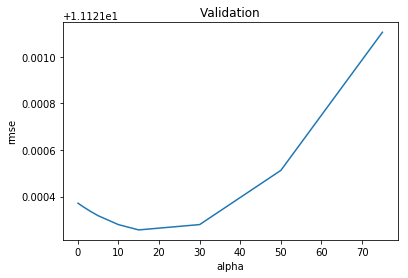

In [73]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [74]:
cv_ridge.min()

11.12125686005244

In [76]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
rmse_cv(model_lasso).mean()


11.12093753115057

# Xgboost

In [117]:
import xgboost as xgb
params = {"max_depth":2, "eta":0.1}
label = np.random.randint(2, size=4)  # binary target
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

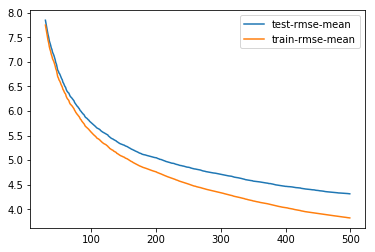

In [118]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()


In [119]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [138]:
preds = model_xgb.predict(X_train)


In [133]:
preds

array([44.446064, 49.779896, 38.598686, ..., 35.883244, 35.63639 ,
       33.565453], dtype=float32)

In [143]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)


In [149]:
lasso_preds = np.expm1(model_lasso.predict(X_test))


In [ ]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")